# Optical depth SIE model validation

* This notebook shows example how to use the `OpticalDepth` class to create an optical depth distribution for a 'SIE' model and make comparison with various models.

* You can change model or model parameters and compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
from ler.lens_galaxy_population import OpticalDepth

Setting multiprocessing start method to 'fork'


In [2]:
# initialization with default parameters
od = OpticalDepth(verbose=True)

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_json/velocity_dispersion_gengamma/velocity_dispersion_gengamma_14.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_json/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_16.pickle
Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 2.32, 'beta': 2.67, 'phistar': 0.0027439999999999995, 'sigmastar': 161.0}
Chosen optical depth fu

### Let's look at the available functions and priors

In [3]:
od.available_velocity_dispersion_list_and_its_params

{'velocity_dispersion_gengamma': {'vd_min': 50.0,
  'vd_max': 420.0,
  'alpha': 2.32,
  'beta': 2.67,
  'phistar': 0.0027439999999999995,
  'sigmastar': 161.0},
 'velocity_dispersion_bernardi': {'vd_min': 50.0,
  'vd_max': 420.0,
  'alpha': 0.94,
  'beta': 1.85,
  'phistar': 0.02099,
  'sigmastar': 113.78},
 'velocity_dispersion_ewoud': {'vd_min': 50.0,
  'vd_max': 420.0,
  'alpha': 0.94,
  'beta': 1.85,
  'phistar': 0.02099,
  'sigmastar': 113.78}}

In [4]:
od.available_optical_depth_list_and_its_params

{'optical_depth_sis_analytic': None,
 'optical_depth_SIS_hemanta': None,
 'optical_depth_SIE_hemanta': None}

## Choice 1

* optical_depth_sis_analytic (analytical)

* velocity_dispersion_gengamma

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [11]:
od1 = OpticalDepth(
    npool=6,
    z_min=0.,
    z_max=10.,
    optical_depth_function="optical_depth_sis_analytic",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min = 0., vd_max = 420., alpha = 2.32, beta = 2.67, phistar = 8.0e-3*cosmo.h**3, sigmastar = 161.0),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    #create_new_interpolator=True,
    )


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_json/velocity_dispersion_gengamma/velocity_dispersion_gengamma_10.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.<lambda> at 0x34b905fc0>) has been set.
Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 0.0, 'vd_max': 420.0, 'alpha': 2.32, 'beta': 2.67, 'phistar': 0.0027439999999999995, 'sigmastar': 161.0}
Chose

## Choice 2

* optical_depth_SIS_hemanta (numerical)

* velocity_dispersion_bernardi

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [5]:
od2 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIS_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_json/velocity_dispersion_bernardi/velocity_dispersion_bernardi_7.pickle
optical_depth_SIS_hemanta interpolator will be loaded from ./interpolator_json/optical_depth_SIS_hemanta/optical_depth_SIS_hemanta_14.pickle
Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: optica

## Choice 3

* optical_depth_SIE_hemanta (numerical)

* velocity_dispersion_bernardi

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [6]:
od3 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIE_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_json/velocity_dispersion_bernardi/velocity_dispersion_bernardi_7.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_json/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_17.pickle
Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: optica

## Choice 4

* optical_depth_SIE_hemanta (numerical)

* velocity_dispersion_ewoud

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [7]:
od4 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIE_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_json/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_18.pickle
Chosen velocity dispersion sampler: velocity_dispersion_ewoud
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: optical_depth_SIE

## Choice 4

* optical_depth_SIE_hemanta (numerical)

* velocity_dispersion_ewoud

* axis_ratio_rayleigh

* cosmo = Planck18

In [8]:
from astropy.cosmology import Planck18

od5 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIE_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(Planck18.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=Planck18,
    directory="./interpolator_json",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_5.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_5.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_5.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_5.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_11.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_json/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_19.pickle
Chosen velocity dispersion sampler: velocity_dispersion_ewoud
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.01895458581453365, 'sigmastar': 113.78}
Chosen optical depth function: optic

## Velocity dispersion

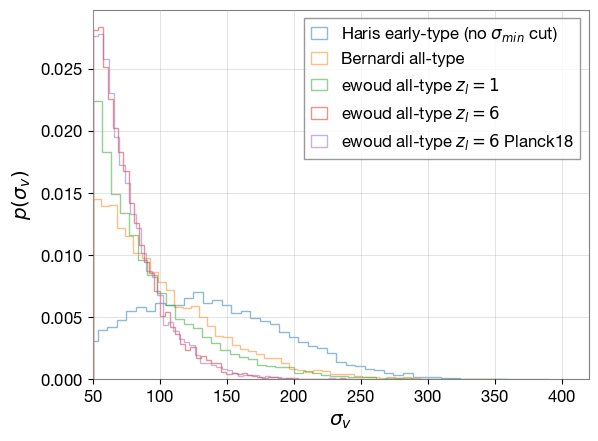

In [ ]:
# plot hist
sigma1 = od1.sample_velocity_dispersion(size=10000,)
sigma2 = od2.sample_velocity_dispersion(size=10000)
sigma3 = od3.sample_velocity_dispersion(size=10000)
sigma4 = od4.sample_velocity_dispersion(size=10000, zl=1)
sigma5 = od4.sample_velocity_dispersion(size=10000, zl=6)
sigma6 = od5.sample_velocity_dispersion(size=10000, zl=6)
plt.hist(sigma1, bins=50, density=True, alpha=0.5, label=r"Haris early-type (no $\sigma_{min}$ cut)", histtype="step")
plt.hist(sigma2, bins=50, density=True, alpha=0.5, label="Bernardi all-type", histtype="step")
plt.hist(sigma4, bins=50, density=True, alpha=0.5, label="ewoud all-type $z_l=1$", histtype="step")
plt.hist(sigma5, bins=50, density=True, alpha=0.5, label="ewoud all-type $z_l=6$", histtype="step")
plt.hist(sigma6, bins=50, density=True, alpha=0.5, label="ewoud all-type $z_l=6$ Planck18", histtype="step")
plt.xlim(50, 420)
plt.xlabel(r"$\sigma_v$")
plt.ylabel(r"$p(\sigma_v)$")
plt.legend()
plt.grid(alpha=0.5)

plt.show()

* It Ewoud velocity dispersion with zl dependence should roughly follow Halo-mass function.

## Optical depth

In [ ]:
# integrate optical depth wrt z
# vd_min lim vs no lim
from scipy.integrate import quad
tau1 = quad(lambda z: od1.strong_lensing_optical_depth(np.array([z]))[0], 0.001, 10)[0]
tau2 = quad(lambda z: od2.strong_lensing_optical_depth(np.array([z]))[0], 0.001, 10)[0]

tau1, tau2, tau2/tau1

(0.018224115533462808, 0.05279596175851599, 2.8970383589575555)

* around 3% difference between SIS (Choi et al. 2008) and SIS (Bernardi et al. 2010) models.

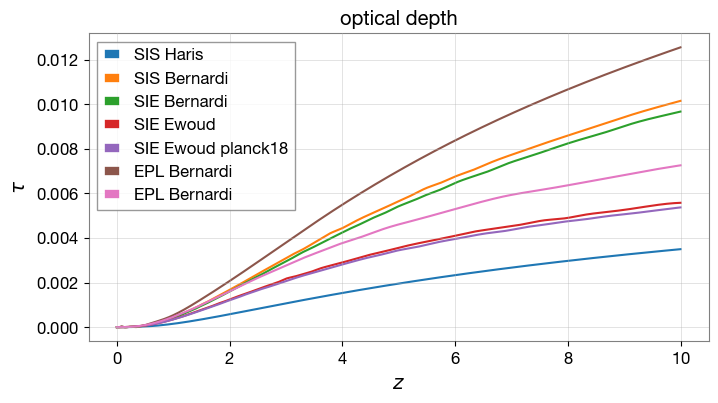

In [13]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.strong_lensing_optical_depth(z), label=r"SIS Haris")
plt.plot(z, od2.strong_lensing_optical_depth(z), label=r"SIS Bernardi")
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od4.strong_lensing_optical_depth(z), label=r"SIE Ewoud ")
plt.plot(z, od5.strong_lensing_optical_depth(z), label=r"SIE Ewoud planck18")
plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.plot(z, od7.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

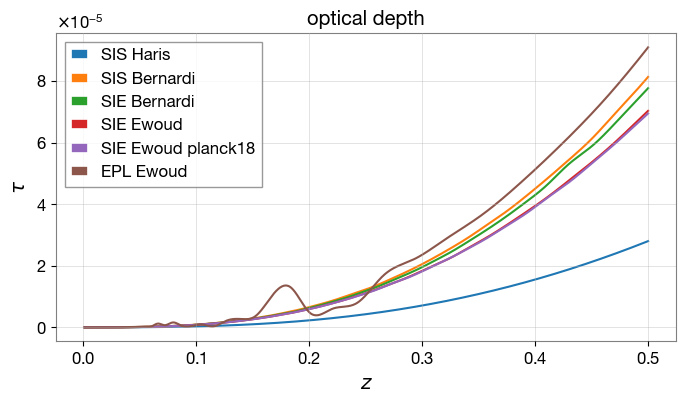

In [26]:
z = np.linspace(0.001, 0.5, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.strong_lensing_optical_depth(z), label=r"SIS Haris")
plt.plot(z, od2.strong_lensing_optical_depth(z), label=r"SIS Bernardi")
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od4.strong_lensing_optical_depth(z), label=r"SIE Ewoud ")
plt.plot(z, od5.strong_lensing_optical_depth(z), label=r"SIE Ewoud planck18")
#plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.plot(z, od7.strong_lensing_optical_depth(z), label=r"EPL Ewoud")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

## Distribution of velocity dispersion wrt redshift

* reproduction of Oguri et al. (2018b) Fig. 1 with Ewoud's (code) velocity dispersion model Wempe et al. (2022)

In [21]:
from ler.lens_galaxy_population import pdf_phi_z_div_0
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# combining sigma and q in a function
nsamples_z = 100
nsamples_sigma = 100
z = np.ones(nsamples_sigma)
sigma = np.linspace(50, 400, nsamples_sigma)


In [23]:
num1 = pdf_phi_z_div_0(sigma, z*1.0)
num2 = pdf_phi_z_div_0(sigma, z*2.0)
num3 = pdf_phi_z_div_0(sigma, z*3.0)
num4 = pdf_phi_z_div_0(sigma, z*4.0)
num5 = pdf_phi_z_div_0(sigma, z*5.0)
num6 = pdf_phi_z_div_0(sigma, z*6.0)

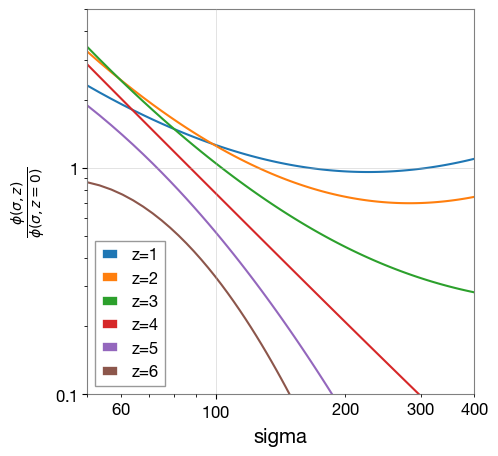

In [37]:
plt.figure(figsize=(5,5))
plt.plot(sigma, num1, label='z=1')
plt.plot(sigma, num2, label='z=2')
plt.plot(sigma, num3, label='z=3')
plt.plot(sigma, num4, label='z=4')
plt.plot(sigma, num5, label='z=5')
plt.plot(sigma, num6, label='z=6')
plt.xlabel('sigma')
plt.ylabel(r'$\frac{\phi(\sigma,z)}{\phi(\sigma,z=0)}$')
plt.yscale('log', base=10)
plt.xscale('log', base=10)
plt.ylim(1e-1,0.5e1)
plt.xlim(50, 400)
plt.grid(alpha=0.5)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [11]:
od6 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_EPL_SHEAR_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=False, resolution=20)),
    )

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_json/velocity_dispersion_bernardi/velocity_dispersion_bernardi_7.pickle
optical_depth_EPL_SHEAR_hemanta interpolator will be loaded from ./interpolator_json/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_1.pickle
Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth

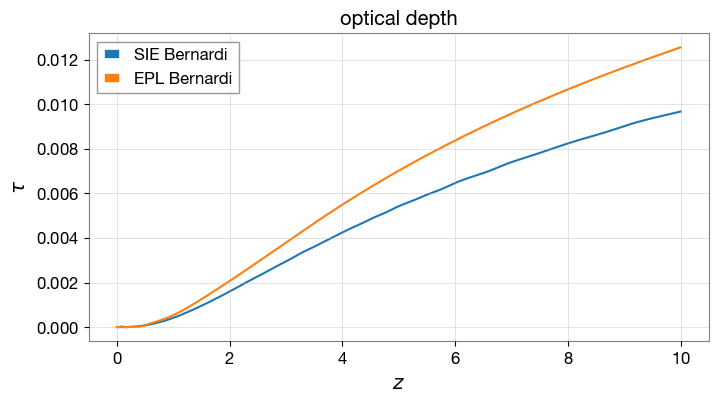

In [5]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

In [ ]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

In [ ]:
od7 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_EPL_SHEAR_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=False, resolution=100)),
    )
#389m 8s= 6hr 29m 8s

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
optical_depth_EPL_SHEAR_hemanta interpolator will be generated at ./interpolator_json/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_3.pickle
Computing optical depth with multiprocessing...


100%|██████████| 100/100 [6:29:07<00:00, 233.48s/it] 

Chosen velocity dispersion sampler: velocity_dispersion_ewoud
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: optical_depth_EPL_SHEAR_hemanta
Chosen axis ratio sampler: axis_ratio_rayleigh
Chosen axis ratio sampler params: {'q_min': 0.2, 'q_max': 1}
Chosen cosmology: LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
Chosen lens_type: sie_galaxy


Setting multiprocessing start method to 'fork'


In [8]:
od8 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_epl_shear_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=False, resolution=100)),
    )
# 100, 5000, 389m 8s= 6hr 29m 8s


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.<lambda> at 0x349488280>) has been set.
Using pre-gererated optical depth function.
  funtion_name: optical_depth_epl_shear_hemanta.
  velocity_dispersion: velocity_dispersion_ewoud
  axis_ratio: axis_ratio_rayleigh
optical_depth_epl_shear_hemanta interpolator will be loaded fr

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
from ler.lens_galaxy_population import OpticalDepth

Setting multiprocessing start method to 'fork'


In [2]:
od7 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=1.0,
    optical_depth_function="optical_depth_epl_shear_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min = 50., vd_max = 420., alpha = 2.32, beta = 2.67, phistar = 8.0e-3*cosmo.h**3, sigmastar = 161.0),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=True, resolution=10)),
    )
# 100, 5000, 389m 8s= 6hr 29m 8s


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_8.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_8.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_8.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_8.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_json/velocity_dispersion_gengamma/velocity_dispersion_gengamma_15.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.<lambda> at 0x3510c1fc0>) has been set.
optical_depth_epl_shear_numerical interpolator will be generated at ./interpolator_json/optical_depth_epl_shear_numerical/optical_depth_epl_shear_numerical_7.pickle
Computing optical depth with multiprocessing...


100%|████████████████████████████████████████████████████████████| 18/18 [1:42:43<00:00, 342.40s/it]

Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 2.32, 'beta': 2.67, 'phistar': 0.0027439999999999995, 'sigmastar': 161.0}
Chosen optical depth function: CPUDispatcher(<function OpticalDepth.initialize_interpolator_optical_depth_function.<locals>.<lambda> at 0x106655d80>)
Chosen axis ratio sampler: axis_ratio_rayleigh
Chosen axis ratio sampler params: {'q_min': 0.2, 'q_max': 1}
Chosen cosmology: LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
Chosen lens_type: sie_galaxy


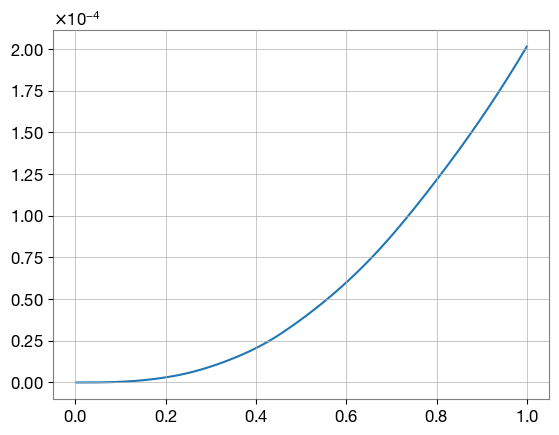

In [3]:
zs = np.linspace(0.001, 1, 1000)
tau7 = od7.strong_lensing_optical_depth(zs)
# tau1 = od1.strong_lensing_optical_depth(zs)

plt.plot(zs, tau7)
# plt.plot(zs, tau1)
plt.show()

In [7]:
from ler.utils import load_pickle, cubic_spline_interpolator

coeff1 = load_pickle('/Users/phurailatpamhemantakumar/phd/mypackages/ler/examples/optical_depth/interpolator_json/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_1.pickle')

tau_fn1 = lambda zs: cubic_spline_interpolator(zs, coeff1[0], coeff1[1])
len(coeff1[1])

20

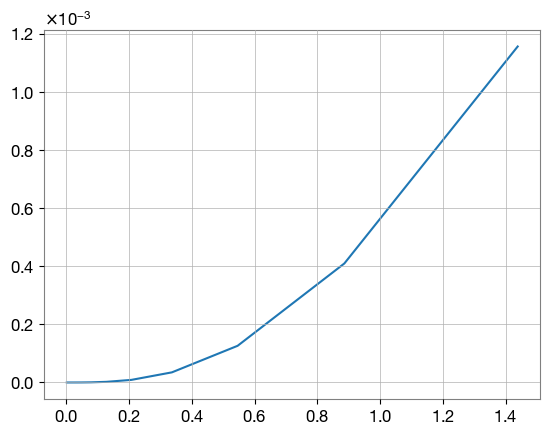

In [11]:
idx_1 = 16
zs1 = coeff1[1][:idx_1]
tau1 = tau_fn1(coeff1[1][:idx_1])
tau1 = np.sort(tau1)

plt.plot(zs1, tau1)

In [ ]:
od7 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_epl_shear_numerical",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=True, resolution=25)),
    )
# 100, 5000, 389m 8s= 6hr 29m 8s

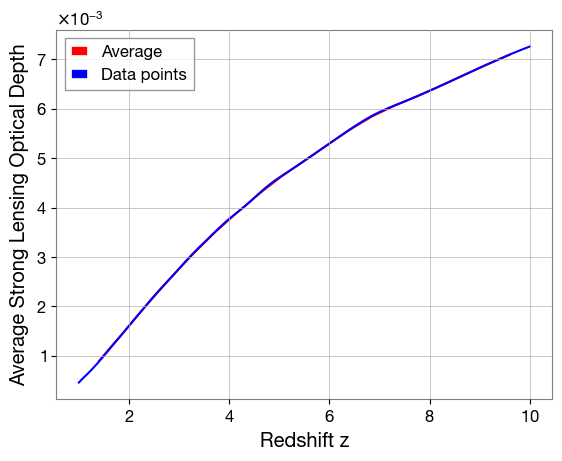

In [215]:
import numpy as np
import matplotlib.pyplot as plt

z_min = 1.0
z_max = 10.0
size = 100
steps = 10
overlap = 5  # 50% overlap

# Generating data
x_selected = np.linspace(z_min + 0.001, z_max, size)
y_selected = od7.strong_lensing_optical_depth(x_selected)  # Assuming this function is defined

j = 0
x_avg = []
y_avg = []
# Averaging with overlap
for i in range(int(size/(steps-overlap)-1)):
    k = j + steps
    x_avg.append(np.mean(x_selected[j:k]))  # Mean of x values in the window
    y_avg.append(np.mean(y_selected[j:k]))  # Mean of y values in the window
    j = k - overlap

x_avg = np.array(x_avg)
y_avg = np.array(y_avg)
# insert 0
# x_avg = np.insert(x_avg, 0, 0)
# y_avg = np.insert(y_avg, 0, 0)

# Plotting the results
plt.plot(x_avg, y_avg, label="Average", color="red")
plt.plot(x_selected, y_selected, label="Data points", color="blue")
plt.xlabel("Redshift z")
plt.ylabel("Average Strong Lensing Optical Depth")
# plt.xlim(0, 0.2)
# plt.ylim(0, 0.1e-4)
plt.legend()
plt.show()


In [217]:
# save x_avg and y_avg
np.save("z_avg2.npy", x_avg)
np.save("tau_avg2.npy", y_avg)

In [212]:
# save x_avg and y_avg
np.save("z_avg1.npy", x_avg)
np.save("tau_avg1.npy", y_avg)

In [218]:
# combine the two
z_avg1 = np.load("z_avg1.npy")
tau_avg1 = np.load("tau_avg1.npy")
z_avg2 = np.load("z_avg2.npy")
tau_avg2 = np.load("tau_avg2.npy")
z_avg = np.concatenate((z_avg1, z_avg2))
tau_avg = np.concatenate((tau_avg1, tau_avg2))

# save x_avg and y_avg
np.save("z_avg.npy", z_avg)
np.save("tau_avg.npy", tau_avg)

In [222]:
z_avg

array([0.        , 0.04640909, 0.09686364, 0.14731818,
       0.19777273, 0.24822727, 0.29868182, 0.34913636,
       0.39959091, 0.45004545, 0.5005    , 0.55095455,
       0.60140909, 0.65186364, 0.70231818, 0.75277273,
       0.80322727, 0.85368182, 0.90413636, 0.95459091,
       1.41004545, 1.8645404 , 2.31903535, 2.7735303 ,
       3.22802525, 3.6825202 , 4.13701515, 4.5915101 ,
       5.04600505, 5.5005    , 5.95499495, 6.4094899 ,
       6.86398485, 7.3184798 , 7.77297475, 8.2274697 ,
       8.68196465, 9.1364596 , 9.59095455])

In [223]:
tau_avg

array([0.00000000e+00, 2.33679440e-07, 1.21068032e-06,
       3.61579620e-06, 7.99460472e-06, 1.47705453e-05,
       2.42791548e-05, 3.67347778e-05, 5.22743666e-05,
       7.11013635e-05, 9.31872527e-05, 1.18348645e-04,
       1.46573236e-04, 1.77845308e-04, 2.12014770e-04,
       2.48879557e-04, 2.88234927e-04, 3.29875672e-04,
       3.73596542e-04, 4.19192291e-04, 9.06909773e-04,
       1.44126329e-03, 1.98684546e-03, 2.51072235e-03,
       3.00526561e-03, 3.46567995e-03, 3.87913394e-03,
       4.27107128e-03, 4.62909930e-03, 4.94544434e-03,
       5.26147381e-03, 5.57358808e-03, 5.84864060e-03,
       6.06751719e-03, 6.26210180e-03, 6.46573456e-03,
       6.67716179e-03, 6.88692235e-03, 7.08701482e-03])

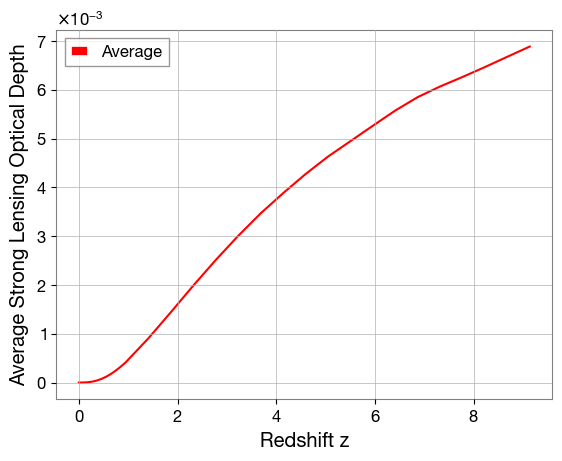

In [221]:
# loadand plot

z_avg = np.load("z_avg.npy")
tau_avg = np.load("tau_avg.npy")

idx = -1
plt.plot(z_avg[:idx], tau_avg[:idx], label="Average", color="red")
plt.xlabel("Redshift z")
plt.ylabel("Average Strong Lensing Optical Depth")
plt.legend()
plt.show()

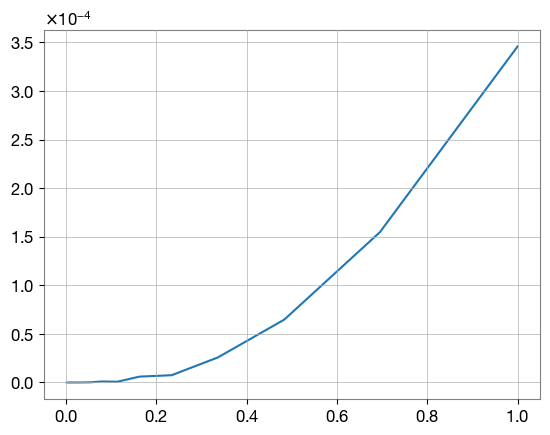

In [189]:
z_min = 0.0
z_max = 1.0
# idx_ = np.array([9, 11, 12, 13, 14, 16])
bool_ = np.ones(100, dtype=bool)
# bool_[idx_] = False
x_selected = np.geomspace(z_min+0.001, z_max, 100)[bool_]
y_selected = od7.strong_lensing_optical_depth(x_selected)

# average out in steps of 0.1
x_avg = np.geomspace(z_min+0.001, z_max, 20)
y_avg = np.zeros_like(x_avg)
for i in range(20):
    y_avg[i] = np.mean(y_selected[i*5:(i+1)*5])

plt.plot(x_avg, y_avg)
plt.show()

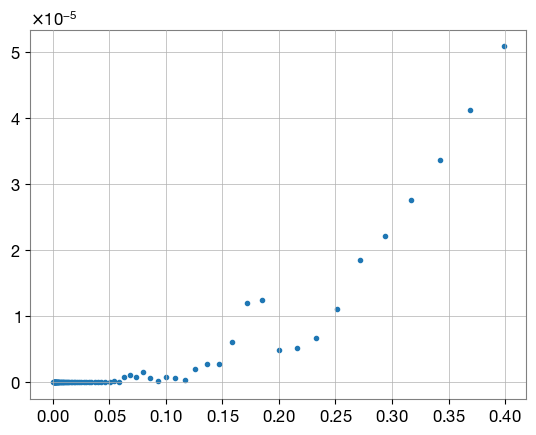

In [187]:
z_min = 0.0
z_max = 2.0
# idx_ = np.array([9, 11, 12, 13, 14, 16])
bool_ = np.ones(100, dtype=bool)
# bool_[idx_] = False
x_selected = np.geomspace(z_min+0.001, z_max, 100)[bool_]

#x_selected = np.delete(x_selected, [28,30,32,33,34,36,37,38,39,41,42,43,44,45,46])
#x_selected = np.delete(x_selected, [41,42,43,44,45,46])
y_selected = od7.strong_lensing_optical_depth(x_selected)

x_selected, y_selected = np.insert(x_selected, 0, 0.), np.insert(y_selected, 0, 0.)
idx = 80
#plt.plot(x_selected[idx:], od7.strong_lensing_optical_depth(x_selected[idx:]), '.')
plt.plot(x_selected[:idx], y_selected[:idx], '.') 
plt.show()

In [54]:
from ler.utils import load_pickle, cubic_spline_interpolator

coeff1 = load_pickle('/Users/phurailatpamhemantakumar/phd/mypackages/ler/examples/optical_depth/interpolator_json/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_7.pickle')

tau_fn1 = lambda zs: cubic_spline_interpolator(zs, coeff1[0], coeff1[1])

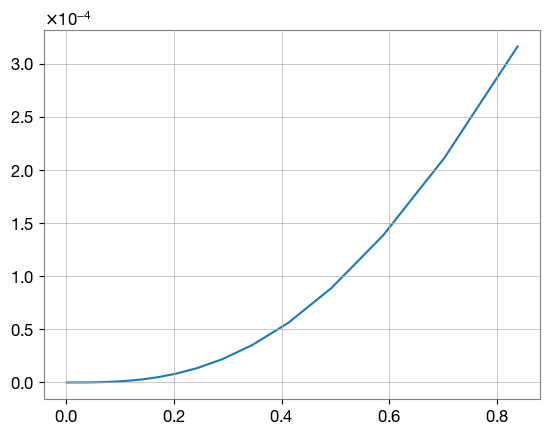

In [60]:
idx_1 = -1
zs1 = coeff1[1][:idx_1]
tau1 = tau_fn1(coeff1[1][:idx_1])
tau1 = np.sort(tau1)

plt.plot(zs1, tau1)

In [59]:
zs1

array([0.001     , 0.00119378, 0.0014251 , 0.00170125,
       0.00203092, 0.00242446, 0.00289427, 0.00345511,
       0.00412463, 0.00492388, 0.00587802, 0.00701704,
       0.00837678, 0.01      , 0.01193777, 0.01425103,
       0.01701254, 0.02030918, 0.02424462, 0.02894266,
       0.03455107, 0.04124626, 0.04923883, 0.05878016,
       0.07017038, 0.08376776, 0.1       , 0.11937766,
       0.14251027, 0.17012543, 0.20309176, 0.2424462 ,
       0.28942661, 0.34551073, 0.41246264, 0.49238826,
       0.58780161, 0.70170383, 0.83767764])

In [66]:
from ler.utils import load_pickle, cubic_spline_interpolator

coeff2 = load_pickle('/Users/phurailatpamhemantakumar/phd/mypackages/ler/examples/optical_depth/interpolator_json/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_3.pickle')

tau_fn2 = lambda zs: cubic_spline_interpolator(zs, coeff[0], coeff[1])

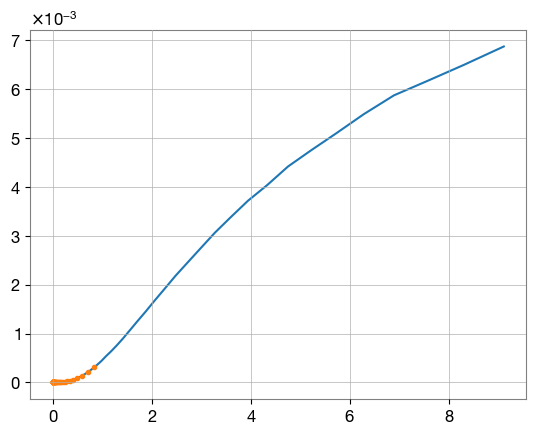

In [67]:
idx_2 = -1
zs2 = coeff2[1][:idx_2]
tau2 = tau_fn2(coeff2[1][:idx_2])
tau2 = np.sort(tau2)

plt.plot(zs2, tau2)
plt.plot(zs1, tau1, '.')
plt.show()

In [68]:
zs2

array([1.00000000e-03, 1.09749877e-03, 1.20450354e-03,
       1.32194115e-03, 1.45082878e-03, 1.59228279e-03,
       1.74752840e-03, 1.91791026e-03, 2.10490414e-03,
       2.31012970e-03, 2.53536449e-03, 2.78255940e-03,
       3.05385551e-03, 3.35160265e-03, 3.67837977e-03,
       4.03701726e-03, 4.43062146e-03, 4.86260158e-03,
       5.33669923e-03, 5.85702082e-03, 6.42807312e-03,
       7.05480231e-03, 7.74263683e-03, 8.49753436e-03,
       9.32603347e-03, 1.02353102e-02, 1.12332403e-02,
       1.23284674e-02, 1.35304777e-02, 1.48496826e-02,
       1.62975083e-02, 1.78864953e-02, 1.96304065e-02,
       2.15443469e-02, 2.36448941e-02, 2.59502421e-02,
       2.84803587e-02, 3.12571585e-02, 3.43046929e-02,
       3.76493581e-02, 4.13201240e-02, 4.53487851e-02,
       4.97702356e-02, 5.46227722e-02, 5.99484250e-02,
       6.57933225e-02, 7.22080902e-02, 7.92482898e-02,
       8.69749003e-02, 9.54548457e-02, 1.04761575e-01,
       1.14975700e-01, 1.26185688e-01, 1.38488637e-01,
       1.5

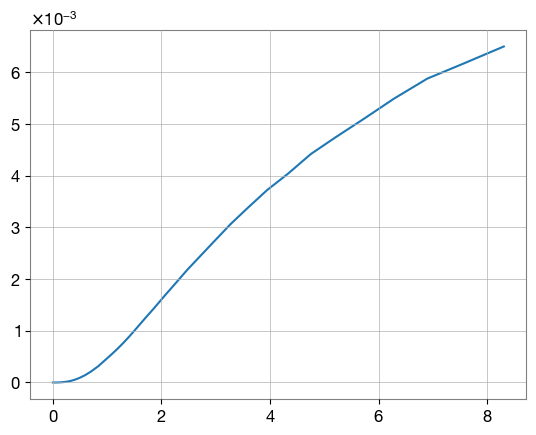

In [72]:
idx1 = zs1<1
zs1 = zs1[idx1]
tau1 = tau1[idx1]

idx2 = zs2>=1
zs2 = zs2[idx2]
tau2 = tau2[idx2]

# combine
idx = -1
zs = np.concatenate((zs1, zs2))[:idx]
tau = np.concatenate((tau1, tau2))[:idx]

plt.plot(zs, tau)
plt.show()

In [74]:
od_epl_ewoud = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    lens_type="epl_shear_galaxy",
    optical_depth_function="optical_depth_epl_shear_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_json",
    verbose=True,
    create_new_interpolator=False,
)


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_json/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_json/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.<lambda> at 0x158b90e50>) has been set.
Using pre-gererated optical depth function.
  funtion_name: optical_depth_epl_shear_hemanta.
  velocity_dispersion: velocity_dispersion_ewoud
  axis_ratio: axis_ratio_rayleigh
optical_depth_epl_shear_hemanta interpolator will be loaded fr

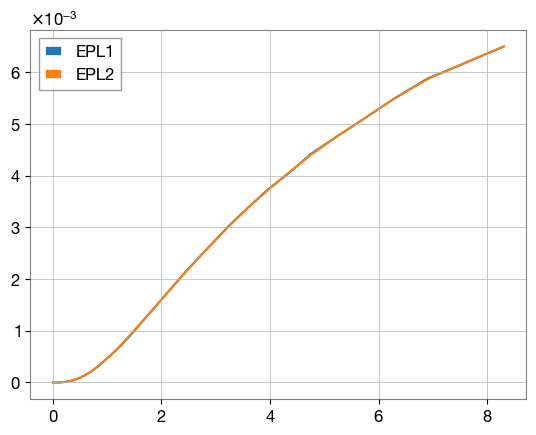

In [93]:
idx = -1
zs = np.concatenate((zs1, zs2))[:idx]
tau = np.concatenate((tau1, tau2))[:idx]
tau_epl = od_epl_ewoud.strong_lensing_optical_depth(zs)

plt.plot(zs, tau, label="EPL1")
plt.plot(zs, tau_epl, label="EPL2")
plt.legend()
plt.show()

In [96]:
tau

array([1.15527463e-12, 1.97745838e-12, 3.42044248e-12,
       5.73656662e-12, 9.80263910e-12, 1.65259975e-11,
       2.80563980e-11, 4.82095050e-11, 8.11340123e-11,
       1.41052806e-10, 2.37407620e-10, 4.03199643e-10,
       7.01808127e-10, 1.17129906e-09, 1.97599322e-09,
       3.38792446e-09, 5.70586617e-09, 9.58941727e-09,
       1.63141304e-08, 2.80485013e-08, 4.67483378e-08,
       7.86528180e-08, 1.32677530e-07, 2.25924306e-07,
       3.80885303e-07, 6.37052573e-07, 1.07297732e-06,
       1.80144135e-06, 2.97968380e-06, 4.95417893e-06,
       8.18524364e-06, 1.34224883e-05, 2.18162969e-05,
       3.52531246e-05, 5.61860740e-05, 8.89294844e-05,
       1.38143282e-04, 2.11136894e-04, 3.16078247e-04,
       5.35866462e-04, 6.37620567e-04, 7.58734646e-04,
       9.00852291e-04, 1.06764325e-03, 1.25204533e-03,
       1.44949683e-03, 1.67588165e-03, 1.91565229e-03,
       2.18168923e-03, 2.45054910e-03, 2.74483701e-03,
       3.06595970e-03, 3.38274240e-03, 3.72105962e-03,
       4.0

In [95]:
np.array([1.15527463e-12, 1.97745838e-12, 3.42044248e-12,
       5.73656662e-12, 9.80263910e-12, 1.65259975e-11,
       2.80563980e-11, 4.82095050e-11, 8.11340123e-11,
       1.41052806e-10, 2.37407620e-10, 4.03199643e-10,
       7.01808127e-10, 1.17129906e-09, 1.97599322e-09,
       3.38792446e-09, 5.70586617e-09, 9.58941727e-09,
       1.63141304e-08, 2.80485013e-08, 4.67483378e-08,
       7.86528180e-08, 1.32677530e-07, 2.25924306e-07,
       3.80885303e-07, 6.37052573e-07, 1.07297732e-06,
       1.80144135e-06, 2.97968380e-06, 4.95417893e-06,
       8.18524364e-06, 1.34224883e-05, 2.18162969e-05,
       3.52531246e-05, 5.61860740e-05, 8.89294844e-05,
       1.38143282e-04, 2.11136894e-04, 3.16078247e-04,
       5.35866462e-04, 6.37620567e-04, 7.58734646e-04,
       9.00852291e-04, 1.06764325e-03, 1.25204533e-03,
       1.44949683e-03, 1.67588165e-03, 1.91565229e-03,
       2.18168923e-03, 2.45054910e-03, 2.74483701e-03,
       3.06595970e-03, 3.38274240e-03, 3.72105962e-03,
       4.03821355e-03, 4.41965673e-03, 4.74913707e-03,
       5.09746468e-03, 5.49022300e-03, 5.87711440e-03,
       6.17060490e-03, 6.49935231e-03])

array([1.00000000e-03, 1.19377664e-03, 1.42510267e-03,
       1.70125428e-03, 2.03091762e-03, 2.42446202e-03,
       2.89426612e-03, 3.45510729e-03, 4.12462638e-03,
       4.92388263e-03, 5.87801607e-03, 7.01703829e-03,
       8.37677640e-03, 1.00000000e-02, 1.19377664e-02,
       1.42510267e-02, 1.70125428e-02, 2.03091762e-02,
       2.42446202e-02, 2.89426612e-02, 3.45510729e-02,
       4.12462638e-02, 4.92388263e-02, 5.87801607e-02,
       7.01703829e-02, 8.37677640e-02, 1.00000000e-01,
       1.19377664e-01, 1.42510267e-01, 1.70125428e-01,
       2.03091762e-01, 2.42446202e-01, 2.89426612e-01,
       3.45510729e-01, 4.12462638e-01, 4.92388263e-01,
       5.87801607e-01, 7.01703829e-01, 8.37677640e-01,
       1.07226722e+00, 1.17681195e+00, 1.29154967e+00,
       1.41747416e+00, 1.55567614e+00, 1.70735265e+00,
       1.87381742e+00, 2.05651231e+00, 2.25701972e+00,
       2.47707636e+00, 2.71858824e+00, 2.98364724e+00,
       3.27454916e+00, 3.59381366e+00, 3.94420606e+00,
       4.3

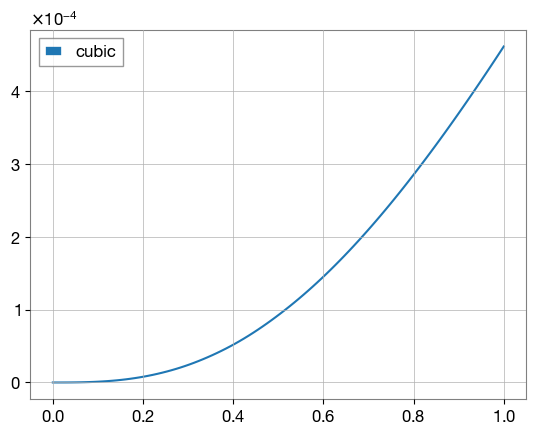

In [143]:
# spline interpolation
from scipy.interpolate import interp1d

x = x_selected
y = od7.strong_lensing_optical_depth(x_selected)
f = interp1d(x, od7.strong_lensing_optical_depth(x), kind='cubic', fill_value='extrapolate')

z = np.linspace(0.0, 1, 100)
plt.plot( z, f(z), label='cubic')
plt.legend()

plt.show()

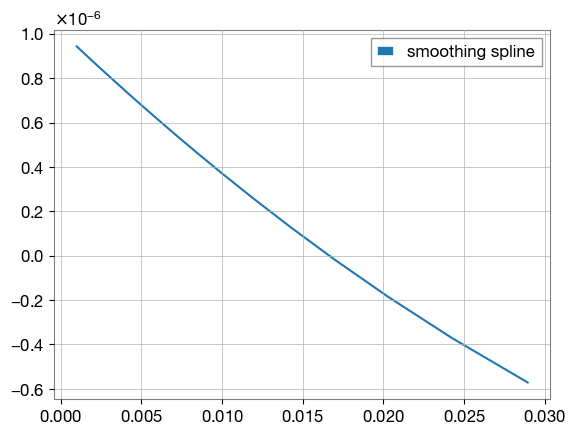

In [33]:
from scipy.interpolate import UnivariateSpline

# Assume z_min is defined elsewhere in your code
z_min = 0.0
z_max = 1.0
x = np.geomspace(z_min + 0.001, z_max, 40)  # Increased number of points for more detail
y = od7.strong_lensing_optical_depth(x)  # Assume this function is defined and gives you the y-values

# Create a smoothing spline with a specific smoothing factor
spline = UnivariateSpline(x, y, s=0.0001)  # Adjust the smoothing factor 's' to achieve desired smoothness

idx = 20
plt.plot(x[:idx], spline(x[:idx]), label='smoothing spline')
plt.legend()
plt.show()

In [22]:
UnivariateSpline?

Init signature:
UnivariateSpline(
    x,
    y,
    w=None,
    bbox=[None, None],
    k=3,
    s=None,
    ext=0,
    check_finite=False,
)
Docstring:     
1-D smoothing spline fit to a given set of data points.

Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
specifies the number of knots by specifying a smoothing condition.

Parameters
----------
x : (N,) array_like
    1-D array of independent input data. Must be increasing;
    must be strictly increasing if `s` is 0.
y : (N,) array_like
    1-D array of dependent input data, of the same length as `x`.
w : (N,) array_like, optional
    Weights for spline fitting.  Must be positive.  If `w` is None,
    weights are all 1. Default is None.
bbox : (2,) array_like, optional
    2-sequence specifying the boundary of the approximation interval. If
    `bbox` is None, ``bbox=[x[0], x[-1]]``. Default is None.
k : int, optional
    Degree of the smoothing spline.  Must be 1 <= `k` <= 5.
    ``k = 3`` is a cubic s

In [227]:
def test(a,b):
    return a+b

test2 = test

test2.__name__

'test'

In [12]:
import numpy as np
from scipy.interpolate import interpn

# Example 5D data (replace with your actual data)
points = (np.arange(10), np.arange(20), np.arange(5), np.arange(8), np.arange(12))
values = np.random.rand(10, 20, 5, 8, 12)  # Your 5D data

# Point where you want to interpolate
point = (2.5, 5.2, 1.8, 3.7, 6.1) 

result = interpn(points, values, point) 
print(result)

[0.52035025]


In [ ]:
from scipy.interpolate import RegularGridInterpolator

# ... (same points and values as above)

interp_func = RegularGridInterpolator(points, values)
result = interp_func(point)
print(result)